<a href="https://colab.research.google.com/github/just-suraj-j/NaiveModel/blob/main/NN_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets._samples_generator import make_blobs,make_classification
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot 
import numpy as np
import plotly.express as px
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [5]:
totalDataSamples=2000
noOfClusters=6

In [2]:
class DataGenerator:
  def __init__(self,totalDataSamples,noOfClusters):
    self.totalDataSamples = totalDataSamples
    self.noOfClusters = noOfClusters
    self.X,self.y=make_blobs(n_samples=totalDataSamples, centers=noOfClusters, n_features=2,cluster_std=2,random_state=2)

  def TrainTestSplit(self, trainTestSplitRatio=.6):
    self.trainTestSplitRatio= trainTestSplitRatio
    self.y=to_categorical(self.y)
    self.n_train = int(round(self.totalDataSamples*trainTestSplitRatio,0))
    self.trainX, self.testX= self.X[:self.n_train,:],self.X[:self.n_train,:]
    self.trainy, self.testy= self.y[:self.n_train,:],self.y[:self.n_train,:]
    return (self.trainX,self.trainy ,self.testX, self.testy)
  
  def Plot(self):
    for class_value in range(self.noOfClusters):
      row_ix = np.where(self.y==class_value)
      pyplot.scatter(self.X[row_ix,0],self.X[row_ix,1])
    pyplot.show()


In [16]:
class NaiveModel:

  def __init__(self,batchsize):
    self.model=Sequential()
    self.batchsize=batchsize
  def BuildSequential(self,noOfClasses,firstLayerNeurons=50,secondLayerNeurons=20):
    self.model.add(Dense(firstLayerNeurons,input_dim=2, activation='relu',kernel_initializer='he_uniform'))
    self.model.add(Dense(secondLayerNeurons, activation='relu',kernel_initializer='he_uniform'))
    self.model.add(Dense(noOfClasses, activation='softmax'))
    opt=SGD(lr=.01,momentum=0.66)
    self.model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    plot_model(self.model,show_shapes=True,to_file='naivemodel1.png')

  def Fit(self,trainX,trainY,testX,testy,noOfEpochs=100,verbose_out=0):
    self.history=self.model.fit(trainX,trainY, validation_data=(testX,testy), epochs=noOfEpochs,verbose=verbose_out,batch_size=self.batchsize)
  
  def PlotFit(self):
    h1=self.history.history
    pyplot.figure(figsize=(20,6))
    pyplot.subplot(1,3,1) 
    ax= sns.lineplot(y=h1['val_accuracy'],x=range(len(h1['val_accuracy'])),label='val_accuracy',palette='binary')
    ax.set(xlabel='epochs',ylabel='val_accuracy')
    ax= sns.lineplot(y=h1['accuracy'],x=range(len(h1['val_accuracy'])),label='accuracy',palette='flare')
    ax.set(xlabel='epochs',ylabel='accuracy')
    pyplot.title('Epochs vs Accuracy(batch='+str(self.batchsize)+')')
    pyplot.subplot(1,3,2)
    ax= sns.lineplot(x=h1['accuracy'],y=h1['val_accuracy'],label='accuracy vs val_accuracy',palette='binary',color='green',sort=False)
    ax.set(xlabel='epochs',ylabel='val_accuracy')
    pyplot.legend()
    pyplot.title('Validate vs Train Accuracy(batch='+str(self.batchsize)+')')
    pyplot.subplot(1,3,3)
    ax= sns.lineplot(y=h1['val_loss'],x= range(len(h1['val_loss'])),label='Loss Convergence',color='red')
    ax.set(xlabel='epochs',ylabel='val loss')
    pyplot.legend()
    pyplot.title('Loss(batch='+str(self.batchsize)+')')
    pyplot.show()

def NaiveModelFactory(batchSize,noOfClusters,trainX,trainy,testX,testy):
  model1= NaiveModel(batchSize)
  model1.BuildSequential(noOfClusters)
  model1.Fit(trainX,trainy,testX,testy)
  model1.PlotFit()   


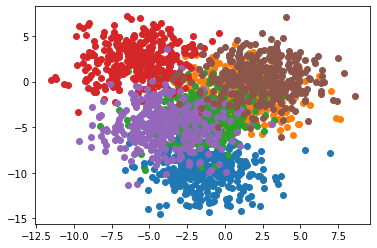

In [6]:
data1= DataGenerator(totalDataSamples, noOfClusters)
data1.Plot()
trainX, trainy, testX,testy = data1.TrainTestSplit()

Running for batch size: 1


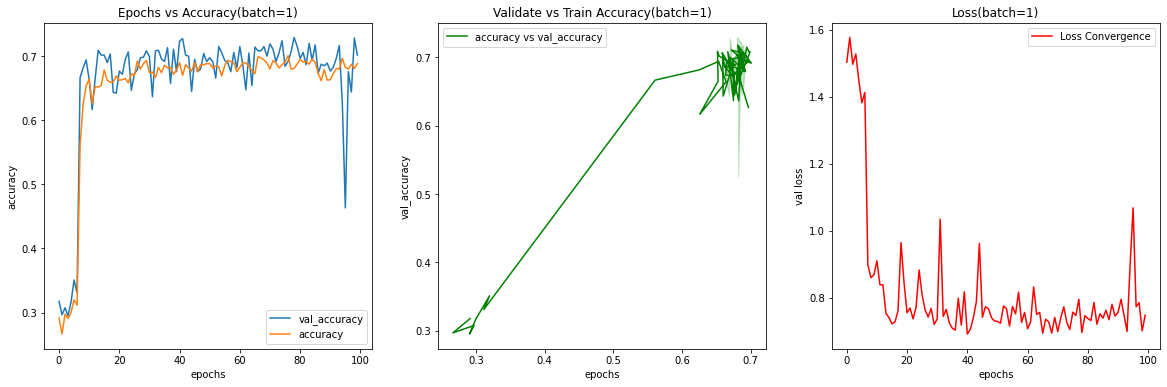

Running for batch size: 32


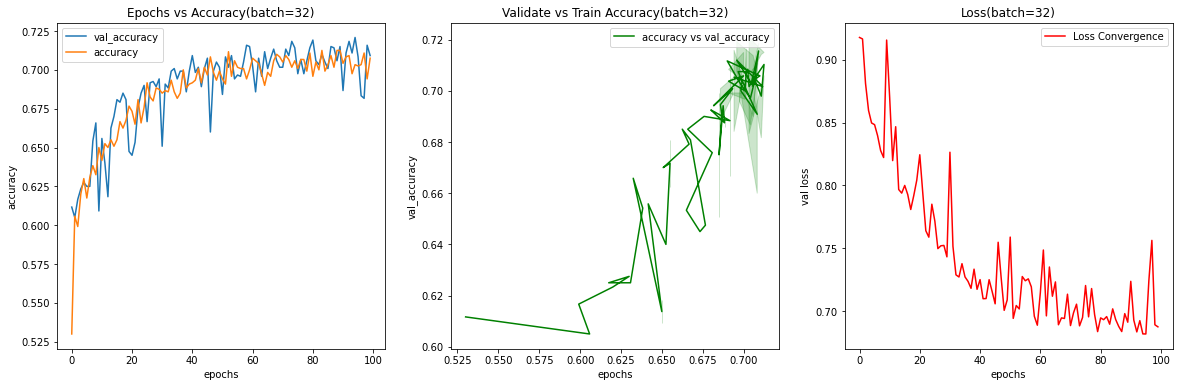

Running for batch size: 64


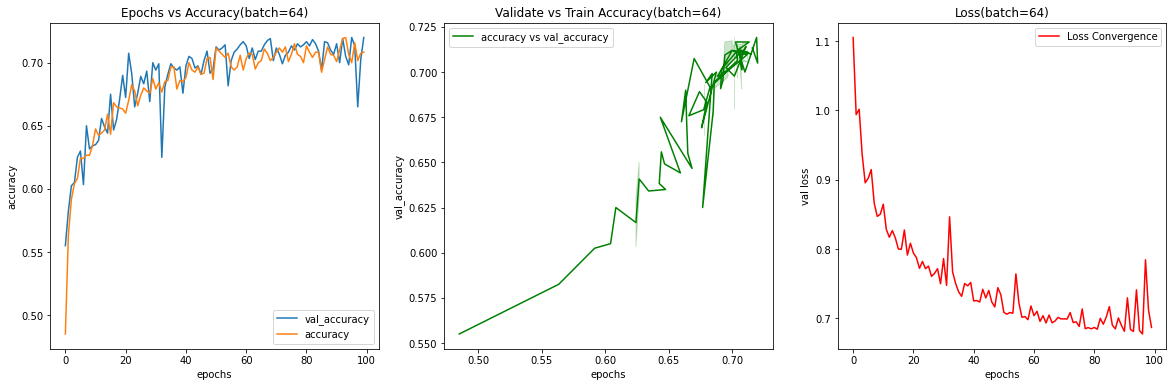

Running for batch size: 128


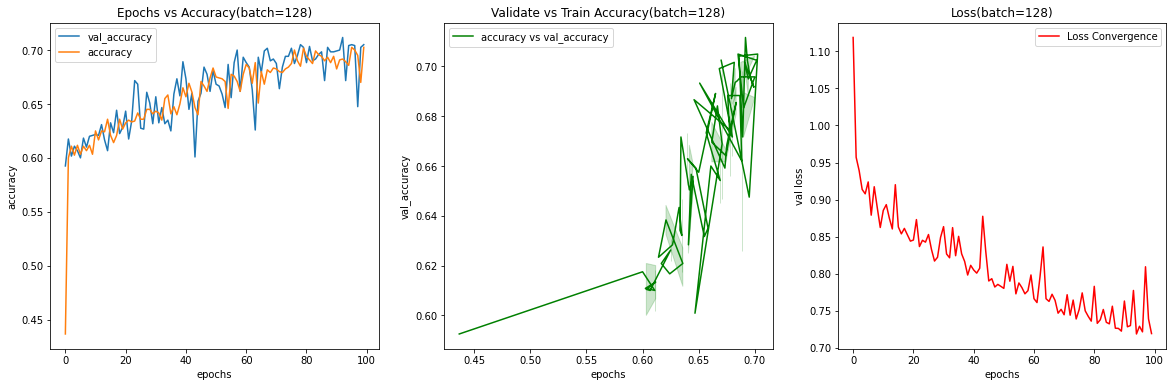

Running for batch size: 256


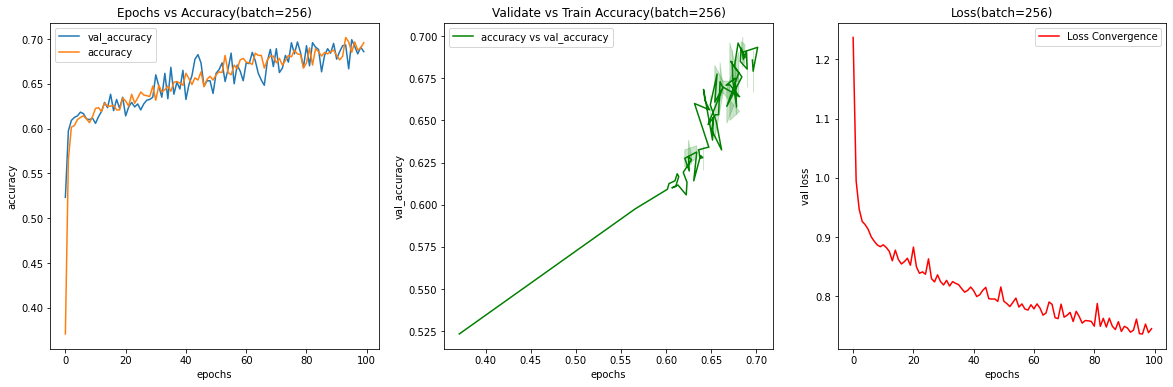

Running for batch size: 1024


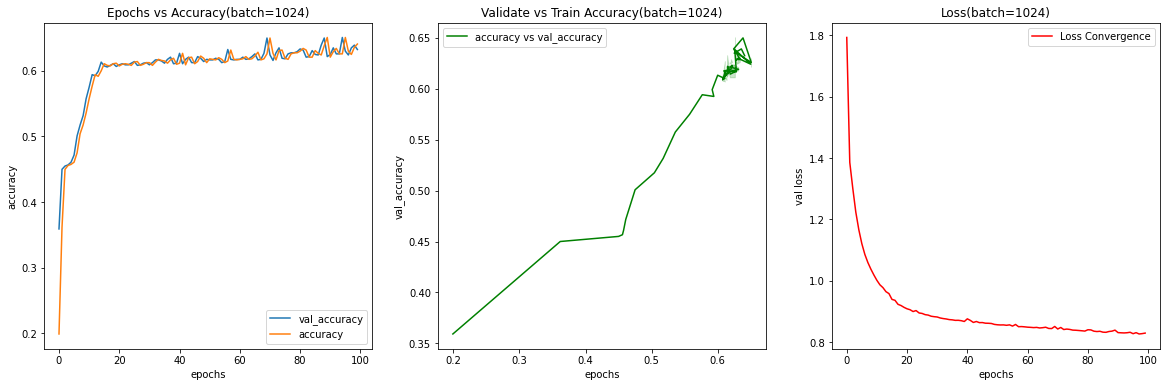

Running for batch size: 2000


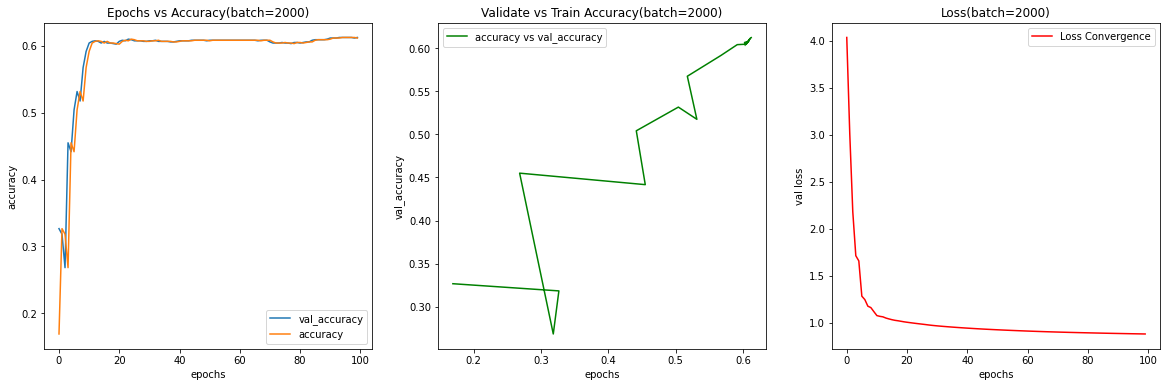

In [18]:
if(True):
  batch_sizes=[1,32,64,128,256,1024,totalDataSamples]
  for i in range(len(batch_sizes)):
    print('Running for batch size:',batch_sizes[i])
    NaiveModelFactory(batch_sizes[i],noOfClusters, trainX,trainy,testX,testy)